In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, SpatialDropout2D
import numpy as np

from keras import callbacks
#earlystopping = callbacks.EarlyStopping(monitor='val_loss',patience=5)
model_checkpoint = callbacks.ModelCheckpoint(
    'first.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max')

import matplotlib.pyplot as plt
def plot_history(history, val_1, val_2, title):
    plt.plot(history.history[val_1])
    plt.plot(history.history[val_2])

    plt.title(title)
    plt.ylabel(val_1)
    plt.xlabel('epoch')
    plt.legend([val_1, val_2], loc='upper left')
    plt.show()

Using TensorFlow backend.


In [6]:
batch_size = 64
input_shape = (150, 150, 3)
categories = 5
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.1,
        horizontal_flip=True,
        rotation_range=10.,
        width_shift_range=0.1,
        height_shift_range=0.1,
        vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './Train',
        target_size=input_shape[:-1],
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        './Test',
        target_size=input_shape[:-1],
        batch_size=batch_size,
        class_mode='categorical')

Found 6000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.25))


model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.25))
  
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(categories, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='Adam',metrics=['accuracy', 'mse'])
history = model.fit_generator(
        train_generator,
        steps_per_epoch = np.ceil(6000/batch_size),
        epochs=100,
        validation_data=validation_generator,
        validation_steps=np.ceil(1000/batch_size),
        callbacks = [model_checkpoint])

Epoch 1/100
94/94 [==============================] - 147s 2s/step - loss: 1.5468 - accuracy: 0.2803 - mse: 0.1537 - val_loss: 1.5993 - val_accuracy: 0.3680 - val_mse: 0.1452
Epoch 2/100
94/94 [==============================] - 133s 1s/step - loss: 1.4269 - accuracy: 0.3478 - mse: 0.1437 - val_loss: 1.2422 - val_accuracy: 0.3930 - val_mse: 0.1417
Epoch 3/100
94/94 [==============================] - 133s 1s/step - loss: 1.3891 - accuracy: 0.3790 - mse: 0.1406 - val_loss: 1.7496 - val_accuracy: 0.3890 - val_mse: 0.1547
Epoch 4/100
94/94 [==============================] - 133s 1s/step - loss: 1.3421 - accuracy: 0.4145 - mse: 0.1368 - val_loss: 1.4681 - val_accuracy: 0.3960 - val_mse: 0.1503
Epoch 5/100
94/94 [==============================] - 133s 1s/step - loss: 1.3082 - accuracy: 0.4287 - mse: 0.1345 - val_loss: 1.3235 - val_accuracy: 0.3900 - val_mse: 0.1475
Epoch 6/100
94/94 [==============================] - 133s 1s/step - loss: 1.2962 - accuracy: 0.4373 - mse: 0.1329 - val_loss: 1.37

Epoch 48/100
94/94 [==============================] - 133s 1s/step - loss: 0.7703 - accuracy: 0.7037 - mse: 0.0800 - val_loss: 0.7485 - val_accuracy: 0.6780 - val_mse: 0.0864
Epoch 49/100
94/94 [==============================] - 133s 1s/step - loss: 0.7517 - accuracy: 0.7023 - mse: 0.0795 - val_loss: 0.9658 - val_accuracy: 0.6340 - val_mse: 0.0965
Epoch 50/100
94/94 [==============================] - 133s 1s/step - loss: 0.7713 - accuracy: 0.6983 - mse: 0.0807 - val_loss: 1.1198 - val_accuracy: 0.6580 - val_mse: 0.0949
Epoch 51/100
94/94 [==============================] - 133s 1s/step - loss: 0.7542 - accuracy: 0.7107 - mse: 0.0787 - val_loss: 0.8790 - val_accuracy: 0.6430 - val_mse: 0.0937
Epoch 52/100
94/94 [==============================] - 133s 1s/step - loss: 0.7616 - accuracy: 0.6933 - mse: 0.0800 - val_loss: 0.8444 - val_accuracy: 0.6830 - val_mse: 0.0859
Epoch 53/100
94/94 [==============================] - 133s 1s/step - loss: 0.7519 - accuracy: 0.7068 - mse: 0.0787 - val_loss

Epoch 95/100
94/94 [==============================] - 134s 1s/step - loss: 0.6356 - accuracy: 0.7522 - mse: 0.0678 - val_loss: 1.0582 - val_accuracy: 0.6920 - val_mse: 0.0824
Epoch 96/100
94/94 [==============================] - 134s 1s/step - loss: 0.6557 - accuracy: 0.7487 - mse: 0.0693 - val_loss: 0.7831 - val_accuracy: 0.6940 - val_mse: 0.0821
Epoch 97/100
94/94 [==============================] - 134s 1s/step - loss: 0.6483 - accuracy: 0.7495 - mse: 0.0688 - val_loss: 0.8166 - val_accuracy: 0.7390 - val_mse: 0.0728
Epoch 98/100
94/94 [==============================] - 134s 1s/step - loss: 0.6533 - accuracy: 0.7465 - mse: 0.0686 - val_loss: 0.8884 - val_accuracy: 0.7150 - val_mse: 0.0763
Epoch 99/100
94/94 [==============================] - 134s 1s/step - loss: 0.6554 - accuracy: 0.7490 - mse: 0.0688 - val_loss: 0.7175 - val_accuracy: 0.7200 - val_mse: 0.0770
Epoch 100/100
94/94 [==============================] - 133s 1s/step - loss: 0.6345 - accuracy: 0.7583 - mse: 0.0667 - val_los

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 148, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
spatial_dropout2d_4 (Spatial (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)       

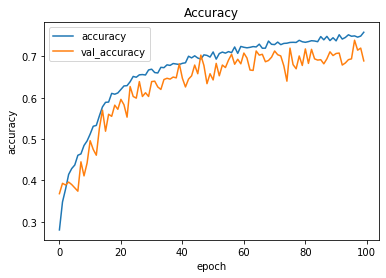

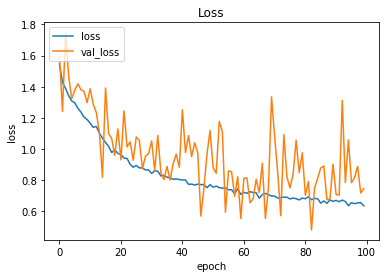

In [6]:
model.summary()
print(model.evaluate_generator(validation_generator))
plot_history(history, 'accuracy', 'val_accuracy', 'Accuracy')
plot_history(history, 'loss', 'val_loss', 'Loss')

In [11]:
model.save('first_final.h5')
print("Model saved")

Model saved


In [69]:
from keras.models import load_model
model2 = load_model('first.h5')
print(model2.evaluate_generator(validation_generator))
model2.summary()

[0.5978381633758545, 0.7390000224113464, 0.07281395047903061]
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 148, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
spatial_dropout2d_4 (Spatial (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        36928     
__________________________________________________________

In [71]:
print(validation_generator.class_indices)
print(train_generator.class_indices)

{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4}
{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4}


(225, 300, 3)


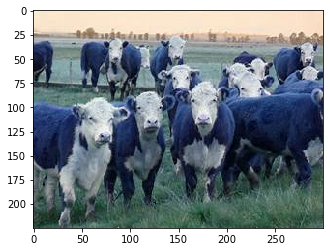

In [76]:
import cv2
img = cv2.imread('./cow.jpeg') #Testing the model with an image of a cow downloaded from the internet
plt.imshow(img)
print(img.shape)


(150, 150, 3)


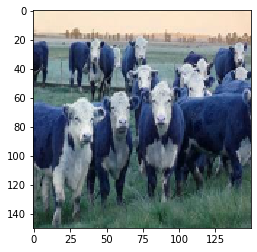

In [77]:
img = cv2.resize(img,(150,150)) #Resizing the image as our model has been trained on a certain size of images
print(img.shape)
plt.imshow(img)

In [107]:
keys = train_generator.class_indices
print(keys)
names = list(keys.keys())
print(names)

{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4}
['butterfly', 'cat', 'chicken', 'cow', 'dog']


In [108]:
y = model2.predict(img.reshape(1,150,150,3))
print(y)
print('Predicted animal: ',[np.argmax(y)], "which is", names[np.argmax(y)], "according to the class indices")

[[0. 0. 0. 1. 0.]]
Predicted animal:  [3] which is cow according to the class indices


(266, 474, 3)


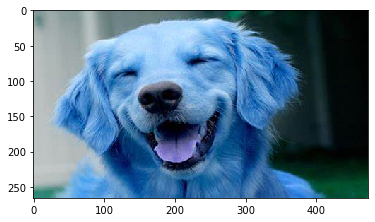

In [115]:
import cv2
img = cv2.imread('./dog.jpg') #Testing the model with an image of a dog downloaded from the internet
plt.imshow(img)
print(img.shape)


(150, 150, 3)


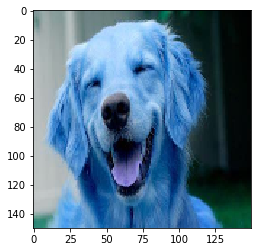

In [116]:
img = cv2.resize(img,(150,150)) #Resizing the image as our model has been trained on a certain size of images
print(img.shape)
plt.imshow(img)

In [117]:
keys = train_generator.class_indices
print(keys)
names = list(keys.keys())
print(names)

{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4}
['butterfly', 'cat', 'chicken', 'cow', 'dog']


In [118]:
y = model2.predict(img.reshape(1,150,150,3))
print(y)
print('Predicted animal: ',[np.argmax(y)], "which is", names[np.argmax(y)], "according to the class indices")

[[0. 0. 0. 0. 1.]]
Predicted animal:  [4] which is dog according to the class indices


(234, 300, 3)


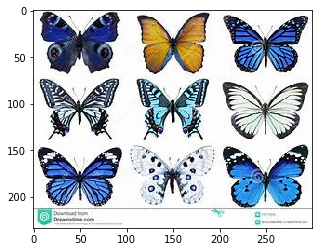

In [119]:
import cv2
img = cv2.imread('./butterfly.jpeg') #Testing the model with an image of a butterfly downloaded from the internet
plt.imshow(img)
print(img.shape)

(150, 150, 3)


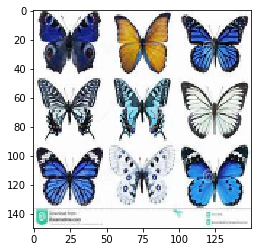

In [120]:
img = cv2.resize(img,(150,150)) #Resizing the image as our model has been trained on a certain size of images
print(img.shape)
plt.imshow(img)

In [121]:
keys = train_generator.class_indices
print(keys)
names = list(keys.keys())
print(names)

{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4}
['butterfly', 'cat', 'chicken', 'cow', 'dog']


In [122]:
y = model2.predict(img.reshape(1,150,150,3))
print(y)
print('Predicted animal: ',[np.argmax(y)], "which is", names[np.argmax(y)], "according to the class indices")

[[1. 0. 0. 0. 0.]]
Predicted animal:  [0] which is butterfly according to the class indices
